In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.optimize as opt
from scipy import integrate

pomiary = pd.read_csv('dane.csv')
pomiary.head(5)
#nerka - długośc nerki
#nerka2 - szerokośc nerki

,wiek,plec,lewa_nerka,lewa_nerka2,prawa_nerka,prawa_nerka2
0,21,k,103,41,112,35
1,75,m,125,72,107,69
2,72,m,93,49,106,51
3,50,m,119,65,110,60
4,37,m,122,73,120,64


## Implementacja MNK

In [2]:
def MNK(xdata, ydata):
    if len(xdata.shape) == 1:
        xN = 1
    else:
        xN = xdata.shape[0] 
    if len(ydata.shape) == 1:
        yN = 1
    else:
        yN = ydata.shape[0] 
    X = xdata.reshape(xN,-1)
    Y = ydata.reshape(yN,-1)
    X = np.vstack([np.ones_like(X[0]), X])
    a = np.linalg.inv(X@X.T) @X@Y.T
    a = np.vstack([a])
    Y_pr = a.T @ X
    return (a, Y_pr) 

## Przykłady działania MNK

### jedne do jeden

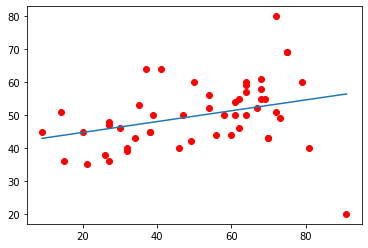

In [3]:
xdata = np.array(pomiary['wiek'].tolist())
ydata = np.array(pomiary['prawa_nerka2'].tolist())
a = MNK(xdata, ydata)[0]

xx = np.linspace(xdata.min(), xdata.max(), 100)
yy = xx*a[1] + a[0]
plt.plot(xdata, ydata, 'ro')
plt.plot(xx,yy)
plt.show()

### wiele do jeden

In [4]:
xdata = np.vstack([pomiary['prawa_nerka2'].tolist(), pomiary['prawa_nerka'].tolist(), pomiary['lewa_nerka2'].tolist(), pomiary['lewa_nerka'].tolist()])
ydata = np.array(pomiary['wiek'].tolist())
MNK(xdata, ydata) #zwarac macierz a i predykcję dla x

(array([[37.47965195],
        [ 0.85341062],
        [-0.65703247],
        [ 0.26157483],
        [ 0.27101657]]),
 array([[32.40066171, 78.77296926, 49.37985942, 65.66405308, 65.41301922,
         56.65214235, 53.36045234, 39.00258635, 43.85082602, 64.21269742,
         39.00258635, 55.95826134, 52.70375675, 57.60460869, 36.89165387,
         46.09131497, 45.12009633, 49.36648595, 62.64665638, 60.14632589,
         57.58399193, 58.94629027, 60.22206839, 51.01561527, 69.99372369,
         45.91780976, 60.21290994, 52.67294492, 49.49105729, 51.85669391,
         47.17322952, 41.26544734, 47.04721214, 40.48777435, 49.91274618,
         52.92617723, 41.01433192, 56.94831475, 59.74279007, 59.17321987,
         39.0683088 , 36.60897041, 41.47186647, 67.94597836, 56.29523982,
         43.45665941, 48.19661437, 30.86679317, 56.14892578, 41.46261365,
         46.63266731]]))

### wiele do wielu

In [5]:
xdata = np.vstack([pomiary['prawa_nerka2'].tolist(), pomiary['prawa_nerka'].tolist()])
ydata = np.vstack([pomiary['lewa_nerka2'].tolist(), pomiary['lewa_nerka'].tolist()])
print(xdata.shape)
MNK(xdata, ydata) #zwarac macierz a i predykcję dla x

(2, 51)


(array([[16.55281369, 73.08477914],
        [ 0.48379847,  0.1631221 ],
        [ 0.12311877,  0.2787958 ]]),
 array([[ 47.2750618 ,  63.10861582,  54.27712466,  59.12378592,
          62.29016745,  53.17773237,  62.65952374,  50.77609323,
          52.61419813,  65.94034744,  50.77609323,  58.67469385,
          54.16268249,  53.045937  ,  52.359284  ,  51.9812511 ,
          54.77827633,  49.78246651,  59.49314222,  58.28798435,
          54.88404189,  71.75460563,  32.87719638,  50.63562127,
          57.29435763,  58.92093138,  56.81923576,  51.85813233,
          52.60552153,  46.73920375,  54.90139509,  51.51480583,
          50.169176  ,  53.59047166,  58.45448611,  55.02451386,
          47.14326644,  60.46941575,  53.0632902 ,  55.49095913,
          47.26638521,  55.66613748,  48.83222277,  57.65503733,
          55.72852006,  47.49526954,  60.15211904,  51.91019192,
          61.21680495,  54.54939199,  47.73283047],
        [110.01918209, 114.17135438, 110.95636084, 113.539

## Model nieliniowy

In [6]:
#ulinioweienie modelu wielomianowego
def poly_data(xdata, N): #xdata -  - dane 1xN 
    X = xdata.reshape(1,-1)
    X = (X-X.min())/(X.max()-X.min()) #zamiana na dane z zakresu <0,1>, abu uniknąć overflow error
    X2 = X
    for i in range(2,N+1):
        X2 = np.vstack([X**i, X2])
    X2 = X2[::-1]

    return X2

### przykład

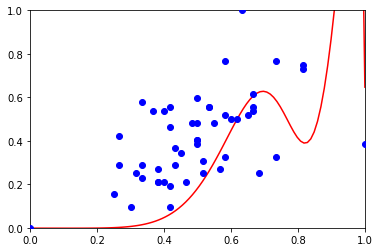

In [7]:
xdata = np.array(pomiary['prawa_nerka2'].tolist())
ydata =  np.array(pomiary['lewa_nerka2'].tolist())

N = 6 # stopień wielomiani

xdata = poly_data(xdata, N)
ydata = poly_data(ydata, N)

xx = np.linspace(xdata.min(), xdata.max(), num=100)
yy = np.zeros_like(xx)

a = MNK(xdata, ydata)[0] 
a = a.reshape(-1) #dostosuję a do wymogów funkcji np.poly1d()
f = np.poly1d(a[::-1])#funkcja wielomianowa dla wektora a

plt.axis([0, 1, 0, 1])
plt.plot(xdata[0], ydata[0], 'ro',color = 'blue', zorder=3)
plt.plot(xx, f(xx), color = "red", zorder=2)

## MNK z regularyzacją

In [8]:
def MNK_regularized(xdata, ydata, lam):
    if len(xdata.shape) == 1:
        xN = 1
    else:
        xN = xdata.shape[0] 
    if len(ydata.shape) == 1:
        yN = 1
    else:
        yN = ydata.shape[0] 
    X = xdata.reshape(xN,-1)
    Y = ydata.reshape(yN,-1)
    X = np.vstack([np.ones_like(X[0]), X])
    I = np.identity((X@X.T).shape[0])
    a = np.linalg.inv((X@X.T) + (I*lam)) @X@Y.T
    a = np.vstack([a])
    
    return (a) 

### przykład

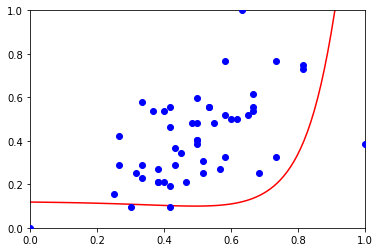

In [9]:
xdata = np.array(pomiary['prawa_nerka2'].tolist())
ydata =  np.array(pomiary['lewa_nerka2'].tolist())

N = 6 # stopień wielomiani
lam = 0.3

xdata = poly_data(xdata, N)
ydata = poly_data(ydata, N)

xx = np.linspace(xdata.min(), xdata.max(), num=100)
yy = np.zeros_like(xx)

a = MNK_regularized(xdata, ydata, lam)
a = a.reshape(-1) #dostosuję a do wymogów funkcji np.poly1d()
f = np.poly1d(a[::-1])#funkcja wielomianowa dla wektora a

plt.axis([0, 1, 0, 1])
plt.plot(xdata[0], ydata[0], 'ro',color = 'blue', zorder=3)
plt.plot(xx, f(xx), color = "red", zorder=2)

## Wpływ regularyzacji na wynik

In [10]:
#eksperyment z MNK taki jak na wykładzie
def simulation(xdata, ydata, N): #xdata, ydata - dane, N - stopień wielomianu
    ydata = poly_data(ydata, 1)
    xdata = poly_data(xdata, N)
    
    xx = np.linspace(xdata.min(), xdata.max(), num=100)
    yy = np.zeros_like(xx)
    
    a = MNK(xdata, ydata)[0]
    
    norma = np.linalg.norm(a) #norma wektora a
    
    a = a.reshape(-1) #dostosuję a do wymogów funkcji np.poly1d()
    f = np.poly1d(a[::-1])#funkcja wielomianowa dla wektora a
    
    #liczę wartosc funkcji bledu
    Q = (ydata[0]-f(xdata[0]))**2
    Q = sum(Q)
    
    #wykres funkcji optymalnej
    plt.plot(xdata[0], ydata[0], 'ro',color = 'blue', zorder=3)
    plt.plot(xx, f(xx), color = "red", zorder=2)
    
    data = pd.DataFrame.from_records(np.vstack([xdata, ydata]).T)

    for i in range(100):
        sim_data = data.sample(8)
        xdata = sim_data.iloc[:, range(N)].to_numpy().T
        ydata = sim_data.iloc[:, -1].to_numpy().T  

        a = MNK(xdata, ydata)[0]

        a = a.reshape(-1) #dostosuję a do wymogów funkcji np.poly1d()
        f = np.poly1d(a[::-1])

        plt.plot(xx, f(xx), color = "orange", zorder=1)

    plt.axis([0, 1, 0, 1])
    plt.legend(['data','model optymalny','model zubożony'])
    plt.title("stopien wielomianu = " + str(N) + "\n norma wektora a = " + str(norma)+ "\n wartosc funkcji bledu = " + str(Q))
    plt.show()

In [11]:
#to samo co wyżej tylko MNK() zamienione na MNK_regularized()
def reg_simulation(xdata, ydata, N, lam): 
    ydata = poly_data(ydata, 1)
    xdata = poly_data(xdata, N)
    
    xx = np.linspace(xdata.min(), xdata.max(), num=100)
    yy = np.zeros_like(xx)
    
    a = MNK_regularized(xdata, ydata, lam)
    
    norma = np.linalg.norm(a) 
    
    a = a.reshape(-1) 
    f = np.poly1d(a[::-1])
    
   
    Q = (ydata[0]-f(xdata[0]))**2
    Q = sum(Q)
    
    
    plt.plot(xdata[0], ydata[0], 'ro',color = 'blue', zorder=3)
    plt.plot(xx, f(xx), color = "red", zorder=2)
    
    data = pd.DataFrame.from_records(np.vstack([xdata, ydata]).T)

    for i in range(100):
        sim_data = data.sample(8)
        xdata = sim_data.iloc[:, range(N)].to_numpy().T
        ydata = sim_data.iloc[:, -1].to_numpy().T  

        a = MNK_regularized(xdata, ydata, lam)

        a = a.reshape(-1) 
        f = np.poly1d(a[::-1])

        plt.plot(xx, f(xx), color = "orange", zorder=1)

    plt.axis([0, 1, 0, 2])
    plt.legend(['data','model optymalny','model zubożony'])
    plt.title("stopien wielomianu = " + str(N) + "\n norma wektora a = " + str(norma)+ "\n wartosc funkcji bledu = " + str(Q))
    plt.show()

In [12]:
data_sample = pomiary.sample(10) # pobieram 10 przykładowych rekordów 

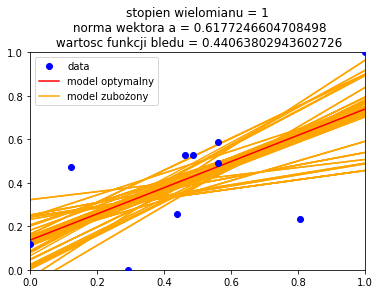

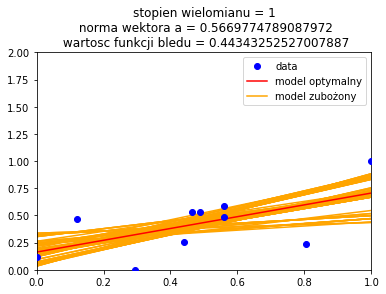

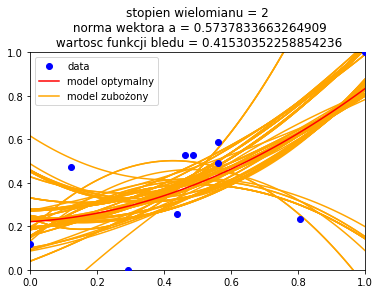

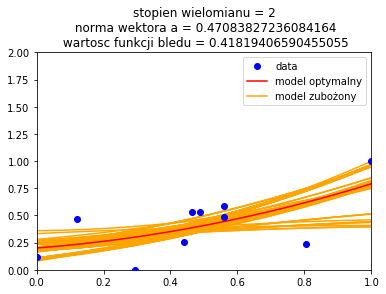

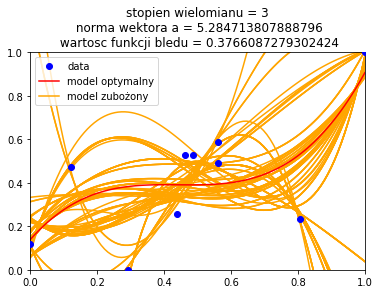

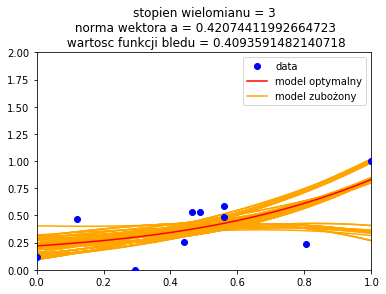

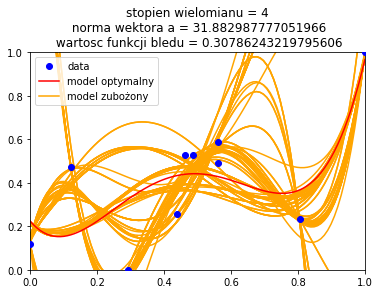

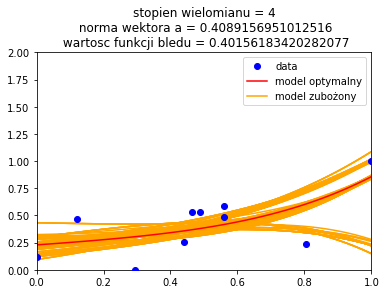

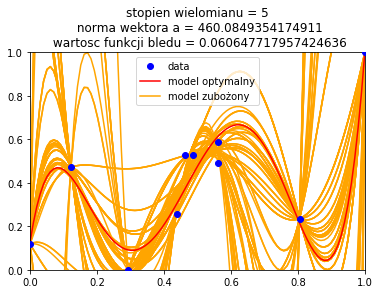

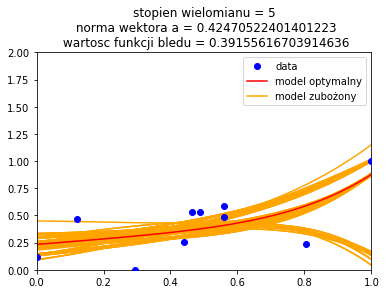

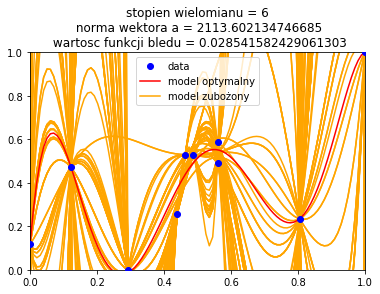

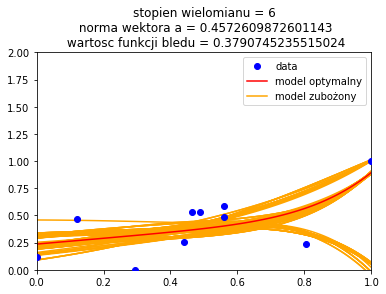

In [13]:
xdata = np.array(data_sample['prawa_nerka'].tolist())
ydata = np.array(data_sample['lewa_nerka'].tolist())
   
N = 6
lam = 0.1

for N in range(1,7):
    simulation(xdata, ydata, N)
    reg_simulation(xdata, ydata, N, lam)

# MNW

### dla rozkladu normalnego analitycznie

In [14]:
def MNW_normal(xdata):
    normal = lambda x, mu, sig : np.exp(-(x-mu)**2/(2*sig**2))/(sig*np.sqrt(2*np.pi))

    xx = np.linspace(xdata.min()-10, xdata.max()+10, num=100)
    yy = normal(xx, xdata.mean(), xdata.std())
    plt.plot(xx,yy)
    plt.plot(xdata, np.zeros_like(xdata), 'o', markersize=15, alpha=0.4)

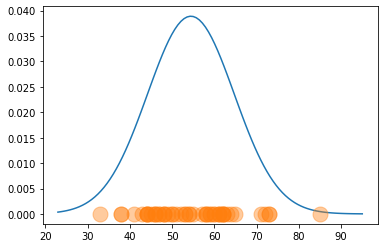

In [15]:
xdata = np.array(pomiary['lewa_nerka2'].tolist())
MNW_normal(xdata)

### dla rozkladu normalnego numerycznie

In [16]:
def MNW_normal_num(xdata):
    normal = lambda x, mu, sig : np.exp(-(x-mu)**2/(2*sig**2))/(sig*np.sqrt(2*np.pi))
    
    def L(para):
        mu, sig = para
        sum = 1
        for x in xdata:
            plt.show()
            sum = sum*np.log(normal(x, mu, sig))
        return -sum
    
    r_pocz = np.random.normal(xdata.min(),xdata.max(),size=2)
    para = opt.minimize(L,r_pocz,method='Nelder-Mead')
    #czasem nie optymalizyje, trzeba go zmusić
    while para['success'] == False:
        r_pocz = np.random.normal(xdata.min(),xdata.max(),size=2)
        para = opt.minimize(L,r_pocz,method='Nelder-Mead')
    
    mu, sig = para['x']
    xx = np.linspace(xdata.min()-10, xdata.max()+10, num=100)
    yy = normal(xx, mu,sig) 
    plt.plot(xx,yy)
    plt.plot(xdata, np.zeros_like(xdata), 'o', markersize=15, alpha=0.4)
    plt.show()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


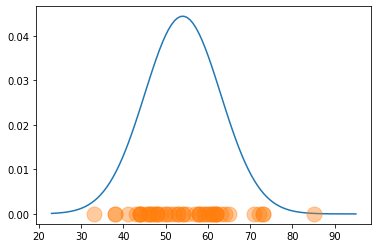

In [17]:
xdata = np.array(pomiary['lewa_nerka2'].tolist())
MNW_normal_num(xdata)

## Estymator Parzena

### estymator o różnych funkcjach jądrowych i wpływ parametru h

In [18]:
def Parzen(xdata, h, K):
    xx = np.linspace(xdata.min()-5,xdata.max()+5, num=100)
    sum = 0
    for i in range(len(xdata)):
        sum += K((xx-xdata[i])/h)/h
    y = sum/len(xdata)
    plt.plot(xx, y)

$K(x)=1/\sqrt{2\pi}e^{-1/2x^2}$ Gaussian

<function matplotlib.pyplot.show(*args, **kw)>

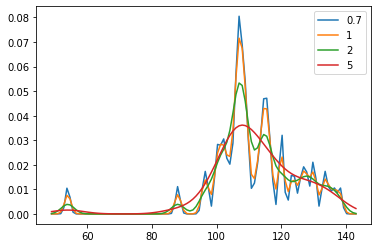

In [19]:
H = [0.7, 1, 2, 5]

xdata = np.array(pomiary['prawa_nerka'].tolist())
K = lambda x: 1/(2*np.pi)**(1/2)*np.exp(-x**2/2) #Gaussian
for h in H:
    Parzen(xdata, h, K)
plt.legend(H)
plt.show

$K(x)=1/(e^x+2+e^{-x})$ Logistic

<function matplotlib.pyplot.show(*args, **kw)>

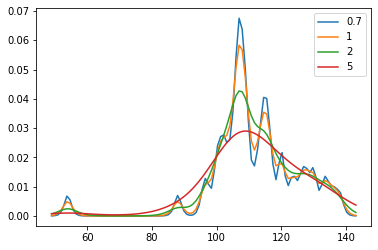

In [20]:
K = lambda x: 1/(np.exp(x)+2+np.exp(-x)) 
for h in H:
    Parzen(xdata, h, K)
plt.legend(H)
plt.show

#### ze względu na charakterystykę dalszych funkcji jądrowych musimy zmienić implementację estymatora

In [21]:
def Parzen2(xdata, h, K):
    x = np.linspace(xdata.min()-3, xdata.max()+3, num=500)

    sum = np.zeros_like(x)
    for j in xdata:
        y = []
        for i in x:
            y.append(K((i-j)/h)/h)
        y = np.array(y)  
        sum += y
    sum = sum/len(xdata)

    plt.plot(x,sum)

   $K(x)=1/2\;dla\;|x|>=1$ Uniform

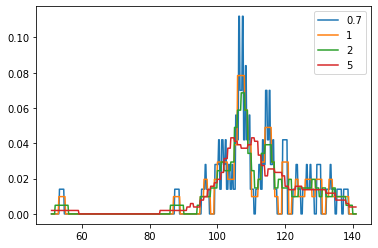

In [22]:
def K(x):
    if x >= -1 and x<=1:
        return 1/2
    else:
        return 0

for h in H:
    Parzen2(xdata, h, K)
plt.legend(H)
plt.show()

$K(x)=3/4(1-x^2)\;dla\;|x|>=1$ Epanechnikov

<function matplotlib.pyplot.show(*args, **kw)>

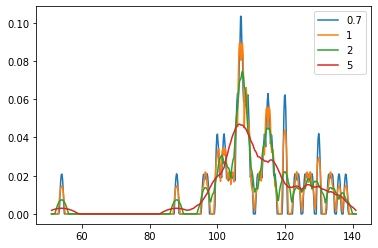

In [23]:
def K(x):
    if x >= -1 and x<=1:
        return(3/4*(1-x**2))
    else:
        return 0
    
for h in H:
    Parzen2(xdata, h, K)
plt.legend(H)
plt.show

$K(x) = (1-|x|)\;dla\;|x|>=1$ Trójkątny

<function matplotlib.pyplot.show(*args, **kw)>

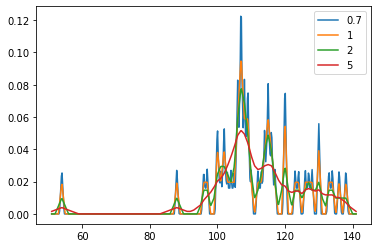

In [24]:
def K(x):
    if x >= -1 and x<=1:
        return(1-np.linalg.norm(x))
    else:
        return 0
    
for h in H:
    Parzen2(xdata, h, K)
plt.legend(H)
plt.show